# Laboratorio 8

Ricardo Pineda | 20160164

Primero, hay que hacer los imports de las librerias que seran usadas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

print('Importado correctamente')

Importado correctamente


Ahora, importar la data y examinarla con un head

In [2]:
dataset_MD = pd.read_csv('titanic_MD.csv')
dataset_MD.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",?,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S


# Solucion

Lo primero es determinar que columnas tienen datos nulos. Para esto se usa la funcion **isna** y se suman los resultados

In [3]:
print(dataset_MD.isna().sum())

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64


Las columnas que tienen datos nulos son: 

- Age

- SibSp

- Parch

- Fare

- Embarked

Sin embargo, hay un detalle que es importante notar. La funcion **isna** solo tomar los valores que python define como valores nulos, pero si una columna tuviera los valores nulos identificados con un caracter en especifico, como '?' por ejemplo, no los va a agarrar.

Con esto en mente, si se examina la columna *Sex* se puede notar que esta columna de hecho si tiene nulos, a pesar de que la funcion sugiere que no.

In [4]:
print(np.unique(dataset_MD.Sex))

['?' 'female' 'male']


Efectivamente, la columna Sex tiene '?' indicando nulos. <br>
Lo que hay que hacer es especificar que los simbolos '?' o cualquier otro identificador de nulos, sean cambiados a nulos de python para que la funcion los agarre.

In [5]:
simbolos = ['?', 'nan', 'NaN', 'null', 'Null']
for i in simbolos:
    dataset_MD = dataset_MD.replace(i, np.nan)
print(dataset_MD.isna().sum())

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64


Efectivamente, ahora hay mas columnas con nulos que previamente. Esta vez, las columnas que contienen nulos son: 

- Sex

- Age

- SibSp

- Parch

- Fare

- Embarked

# Modelos para missing values

## Deletion

Este metodo es muy sencillo de implementar, pues tiene una funcion que hace precisamente esto: **dropna**

 Para medir exactamente cuantos valores fueron eliminados, usare la medida **len** del DataSet

In [6]:
a = len(dataset_MD)
b = dataset_MD.dropna()
b = len(b)
print("\n", 'Cantidad de datos originales: ' , a , "\n", 'Cantidad de datos que fueron eliminados (nulos): ', a - b, "\n", 'Nuevo total sin contar los datos nulos: ', b)


 Cantidad de datos originales:  183 
 Cantidad de datos que fueron eliminados (nulos):  83 
 Nuevo total sin contar los datos nulos:  100


Esta solucion no discrimina, simplemente encuentra valores nulos y los bota. En este caso, bota casi la mitad del dataset y es por este tipo de situaciones que generalmente se busca evitar este metodo.

## Imputación

En este caso vamos a reemplazar cada valor nulo por la media, mediana o moda de la característica a la que pertenece. Lógicamente es aplicable solo cuando la característica es numérica.
Primero, seleccionare las columnas que contienen nulos, luego hare un subset del dataset solo con las variables numericas.

In [7]:
print(dataset_MD[['Age', 'Parch', 'Fare', 'SibSp', 'Embarked', 'Sex']])

      Age  Parch     Fare  SibSp Embarked     Sex
0    38.0    0.0  71.2833    1.0        C     NaN
1    35.0    0.0  53.1000    1.0        S  female
2    54.0    0.0  51.8625    0.0        S    male
3     NaN    NaN  16.7000    1.0        S  female
4    58.0    0.0  26.5500    NaN        S  female
..    ...    ...      ...    ...      ...     ...
178  47.0    1.0      NaN    1.0        S  female
179   NaN    0.0   5.0000    0.0        S     NaN
180  56.0    NaN  83.1583    0.0      NaN  female
181  19.0    0.0  30.0000    0.0        S     NaN
182   NaN    0.0  30.0000    0.0        C     NaN

[183 rows x 6 columns]


Las columnas numericas son:

- Age

- Parch

- Fare

- SibSp

Por ende, hare un subset de la data tomando en cuenta solo esos valores:

In [8]:
dataset_MD[['Age', 'Parch', 'Fare', 'SibSp']].head(3)

,Age,Parch,Fare,SibSp
0,38.0,0.0,71.2833,1.0
1,35.0,0.0,53.1000,1.0
2,54.0,0.0,51.8625,0.0


### Moda

Imputacion utilizando la moda. En este caso en particular si se pueden utilizar todas las variables.

In [9]:
dataset_MD[['Age', 'Parch', 'Fare', 'SibSp', 'Embarked', 'Sex']] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(dataset_MD[['Age', 'Parch', 'Fare', 'SibSp', 'Embarked', 'Sex']])

print(dataset_MD.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### Media

Imputacion utilizando la media

In [10]:
dataset_MD[['Age', 'Parch', 'Fare', 'SibSp']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(dataset_MD[['Age', 'Parch', 'Fare', 'SibSp']])
print(dataset_MD.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### Mediana

Imputacion utilizando la mediana

In [11]:
dataset_MD[['Age', 'Parch', 'Fare', 'SibSp']] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(dataset_MD[['Age', 'Parch', 'Fare', 'SibSp']])
print(dataset_MD.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Countplots

### Age

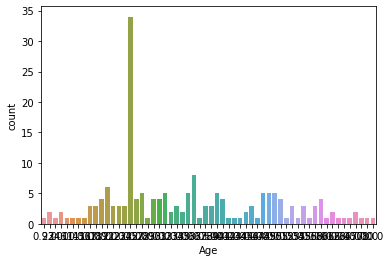

In [12]:
sns.countplot(dataset_MD[dataset_MD['Age'].notna()]['Age'])

### Parch

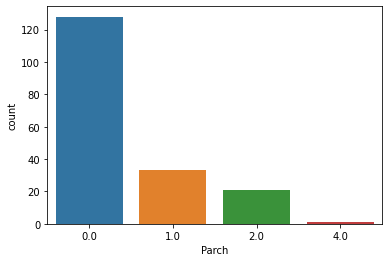

In [13]:
sns.countplot(dataset_MD[dataset_MD['Parch'].notna()]['Parch'])

### Fare

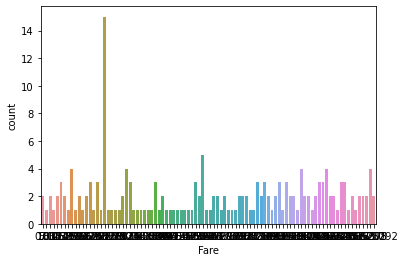

In [14]:
sns.countplot(dataset_MD[dataset_MD['Fare'].notna()]['Fare'])

### SibSp

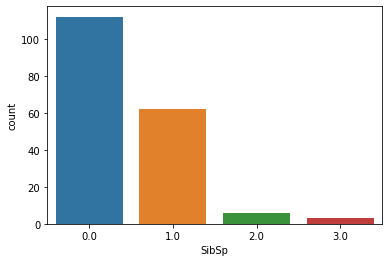

In [15]:
sns.countplot(dataset_MD[dataset_MD['SibSp'].notna()]['SibSp'])

### Sex

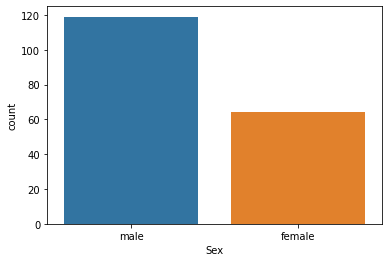

In [16]:
sns.countplot(dataset_MD[dataset_MD['Sex'].notna()]['Sex'])

### Embarked

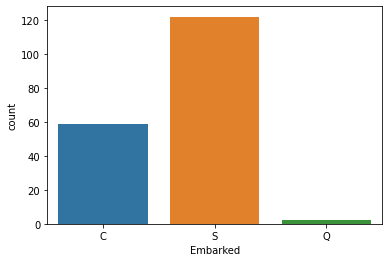

In [39]:
sns.countplot(dataset_MD[dataset_MD['Embarked'].notna()]['Embarked'])

## Imputacion sectorizada

Este tipo de imputacion se utilizada para los valores no numericos

## Imputacion por regresion lineal simple

Este tipo de imputacion sera utilizada para los valores numericos

### Utilizando el tipo de boleto

In [70]:
ds = dataset_MD.dropna()
lm = LinearRegression()
lm = lm.fit(ds[['Survived']], ds['Fare'])

In [71]:
print("\n", 'cantidad de nulos en Fare: ', ds.Fare.isna().sum(), "\n", 'cantidad de nulos en sobrevivientes: ', ds.Survived.isna().sum(), "\n", 'cantidad de nulos en Edad: ', ds.Age.isna().sum(), "\n", 'cantidad de nulos en Parch: ', ds.Parch.isna().sum())


 cantidad de nulos en Fare:  0 
 cantidad de nulos en sobrevivientes:  0 
 cantidad de nulos en Edad:  0 
 cantidad de nulos en Parch:  0


In [78]:
ds['fare_lm'] = lm.predict(ds[['Survived']])

Posibilidad antes de la prediccion 76.67


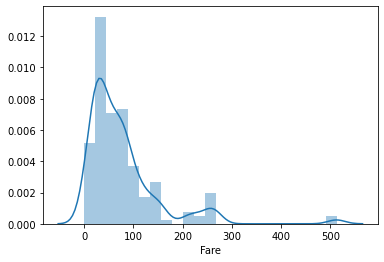

In [79]:
print('Posibilidad antes de la prediccion', round(ds.Fare.mean(), 2))
sns.distplot(ds.Fare)

Posiblidad de supervivencia luego de la prediccion:  0      82.539941
1      82.539941
2      64.630762
3      82.539941
4      82.539941
         ...    
178    82.539941
179    64.630762
180    82.539941
181    82.539941
182    82.539941
Name: fare_lm, Length: 183, dtype: float64
y-hat: 64.63 + 17.91x


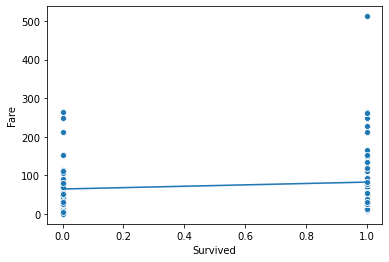

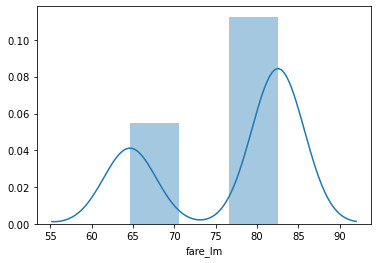

In [80]:
print('Posiblidad de supervivencia luego de la prediccion: ', ds.fare_lm)
print('y-hat: ', round(lm.intercept_,2), ' + ', round(lm.coef_[0], 2), 'x', sep = '')

sns.scatterplot(x = ds.Survived, y = ds.Fare)
sns.lineplot(x = ds.Survived, y = lm.intercept_ + (lm.coef_ * ds.Survived))

plt.ylabel('Fare')
plt.show()
sns.distplot(ds.fare_lm)
plt.show()

Luego de hacer el modelo utilizando el tipo de boleto, se estima que las personas que mas pagaron tenian mucha mayor posibilidad de sobrevivir, pues la relacion entre las variables es directa

### Utilizando la edad de los pasajeros

In [81]:
ds = dataset_MD.dropna()
lm = LinearRegression()
lm = lm.fit(ds[['Survived']], ds['Age'])

In [83]:
ds['age_lm'] = lm.predict(ds[['Survived']])

Posibilidad antes de la prediccion 34.1


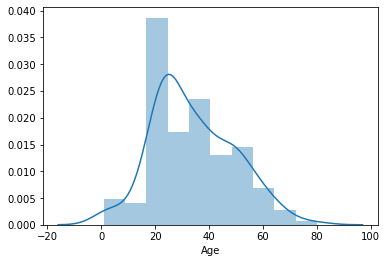

In [84]:
print('Posibilidad antes de la prediccion', round(ds.Age.mean(), 2))
sns.distplot(ds.Age)

Posiblidad de supervivencia luego de la prediccion:  0      31.438374
1      31.438374
2      39.541667
3      31.438374
4      31.438374
         ...    
178    31.438374
179    39.541667
180    31.438374
181    31.438374
182    31.438374
Name: age_lm, Length: 183, dtype: float64
y-hat: 39.54 + -8.1x


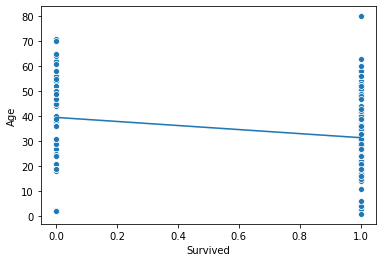

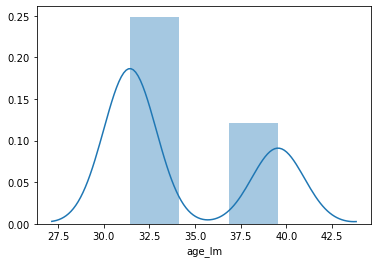

In [86]:
print('Posiblidad de supervivencia luego de la prediccion: ', ds.age_lm)
print('y-hat: ', round(lm.intercept_,2), ' + ', round(lm.coef_[0], 2), 'x', sep = '')

sns.scatterplot(x = ds.Survived, y = ds.Age)
sns.lineplot(x = ds.Survived, y = lm.intercept_ + (lm.coef_ * ds.Survived))

plt.ylabel('Age')
plt.show()
sns.distplot(ds.age_lm)
plt.show()

Al realizar el contraste entre la edad y la posibilidad de supervivencia, se puede argumetnar que no tenia mucho que ver, pues solo tiene una relacion del 31%

### Por SibSp

In [88]:
ds = dataset_MD.dropna()
lm = LinearRegression()
lm = lm.fit(ds[['Survived']], ds['SibSp'])

In [89]:
ds['sibsp_lm'] = lm.predict(ds[['Survived']])

Posibilidad antes de la prediccion 0.45


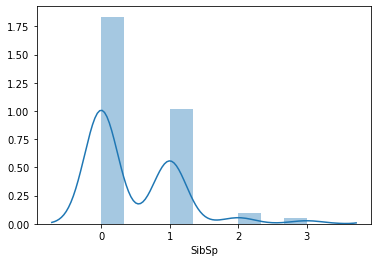

In [90]:
print('Posibilidad antes de la prediccion', round(ds.SibSp.mean(), 2))
sns.distplot(ds.SibSp)

Posiblidad de supervivencia luego de la prediccion:  0      0.504065
1      0.504065
2      0.350000
3      0.504065
4      0.504065
         ...   
178    0.504065
179    0.350000
180    0.504065
181    0.504065
182    0.504065
Name: sibsp_lm, Length: 183, dtype: float64
y-hat: 0.35 + 0.15x


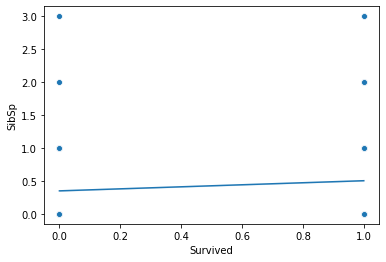

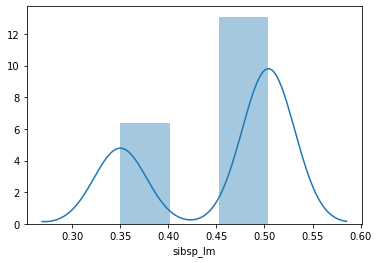

In [91]:
print('Posiblidad de supervivencia luego de la prediccion: ', ds.sibsp_lm)
print('y-hat: ', round(lm.intercept_,2), ' + ', round(lm.coef_[0], 2), 'x', sep = '')

sns.scatterplot(x = ds.Survived, y = ds.SibSp)
sns.lineplot(x = ds.Survived, y = lm.intercept_ + (lm.coef_ * ds.Survived))

plt.ylabel('SibSp')
plt.show()
sns.distplot(ds.sibsp_lm)
plt.show()

Luego de hacer la comparacion entre estas variables, es notable que tiene un 50% de relacion con la posibilidad de los pasajeros para sobrevivir

### Por Parch

In [92]:
ds = dataset_MD.dropna()
lm = LinearRegression()
lm = lm.fit(ds[['Survived']], ds['Parch'])

In [94]:
ds['parch_lm'] = lm.predict(ds[['Parch']])

Posibilidad antes de la prediccion 0.43


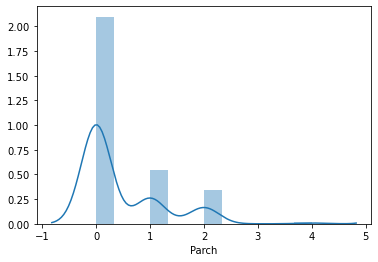

In [96]:
print('Posibilidad antes de la prediccion', round(ds.Parch.mean(), 2))
sns.distplot(ds.Parch)

Posiblidad de supervivencia luego de la prediccion:  0      0.450000
1      0.450000
2      0.450000
3      0.450000
4      0.450000
         ...   
178    0.422764
179    0.450000
180    0.450000
181    0.450000
182    0.450000
Name: parch_lm, Length: 183, dtype: float64
y-hat: 0.45 + -0.03x


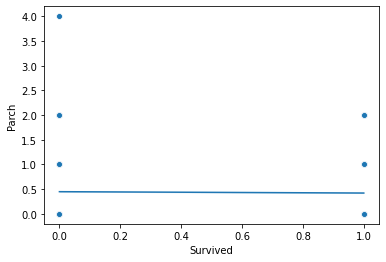

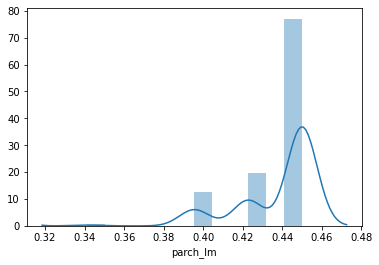

In [97]:
print('Posiblidad de supervivencia luego de la prediccion: ', ds.parch_lm)
print('y-hat: ', round(lm.intercept_,2), ' + ', round(lm.coef_[0], 2), 'x', sep = '')

sns.scatterplot(x = ds.Survived, y = ds.Parch)
sns.lineplot(x = ds.Survived, y = lm.intercept_ + (lm.coef_ * ds.Survived))

plt.ylabel('Parch')
plt.show()
sns.distplot(ds.parch_lm)
plt.show()

Tras hacer la comparacion entre estas variables, se puede determinar que tiene un alto nivel de incidencia en si los pasajeros sobreviven o no.